<a href="https://colab.research.google.com/github/Agnipatel/agni-patel-wasserstoff-AilnternTask/blob/main/Building_an_AI_Pipeline_for_Image_Segmentation_and_Object_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T


In [2]:
# Load a pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 108MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
 #Load and preprocess the image
image_path = '/content/car4.jpg'
image = Image.open(image_path)
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)

In [4]:
# Perform object segmentation
with torch.no_grad():
  predictions = model([image_tensor])


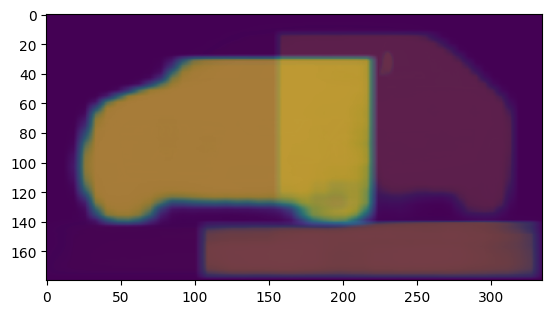

In [5]:
# Display the segmented objects
plt.imshow(image)
for mask in predictions[0]['masks']:
  plt.imshow(mask[0].mul(255).byte().cpu().numpy(), alpha=0.5)
plt.show()


object

In [6]:
import cv2
import os

In [7]:
# Create a directory to store extracted objects
output_dir = 'segmented_objects'
os.makedirs(output_dir, exist_ok=True)

In [8]:
# Extract and save each segmented object
for idx, mask in enumerate(predictions[0]['masks']):
  mask_np = mask[0].mul(255).byte().cpu().numpy()
masked_image = cv2.bitwise_and(cv2.imread(image_path), cv2.imread(image_path),
mask=mask_np)


In [9]:
# Save the object with a unique ID
object_path = os.path.join(output_dir, f'object_{idx}.png')
cv2.imwrite(object_path, masked_image)


True

In [10]:
# Store metadata
metadata = {'object_id': idx, 'image_id': 'master_image'}
# Save metadata in a database or JSON file Deliverables:


 Object Identification

In [11]:
import os
from PIL import Image
import torch


In [12]:
from transformers import CLIPProcessor, CLIPModel

In [13]:
# Load a pre-trained CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
object_descriptions = []


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [14]:
output_dir = "your_output_directory"  # replace with your actual output directory


In [15]:
for idx in range(len(predictions[0]['masks'])):
    object_path = os.path.join(output_dir, f'object_{idx}.png')

    # Ensure the file exists before opening
    if os.path.exists(object_path):
        object_image = Image.open(object_path)
        inputs = processor(images=object_image, return_tensors="pt")
        outputs = model(**inputs)

        logits_per_image = outputs.logits_per_image
        probs = torch.softmax(logits_per_image, dim=1)  # Correct softmax dimension

        print(f'Object {idx} probabilities:', probs)
    else:
        print(f'Object {idx} image not found at path: {object_path}')

Object 0 image not found at path: your_output_directory/object_0.png
Object 1 image not found at path: your_output_directory/object_1.png
Object 2 image not found at path: your_output_directory/object_2.png
Object 3 image not found at path: your_output_directory/object_3.png
Object 4 image not found at path: your_output_directory/object_4.png
Object 5 image not found at path: your_output_directory/object_5.png
Object 6 image not found at path: your_output_directory/object_6.png
Object 7 image not found at path: your_output_directory/object_7.png
Object 8 image not found at path: your_output_directory/object_8.png


In [16]:
from transformers import AutoProcessor, AutoModel

In [17]:
object_descriptions = []

In [18]:
# Optionally print all descriptions at the end
print("All object descriptions:", object_descriptions)

All object descriptions: []


 Text/Data Extraction from Objects


In [19]:
!pip install pytesseract
import pytesseract

In [20]:
import  pytesseract



In [21]:
# Set the path to the Tesseract executable, if needed
# pytesseract.pytesseract.tesseract_cmd = r'path_to_tesseract_executable'  # Uncomment and set if necessary

output_dir = "your_output_directory"  # replace with your actual output directory
extracted_texts = []

for idx in range(len(predictions[0]['masks'])):
    object_path = os.path.join(output_dir, f'object_{idx}.png')

    # Ensure the file exists before opening
    if os.path.exists(object_path):
        object_image = Image.open(object_path)
        text = pytesseract.image_to_string(object_image)
        extracted_texts.append((idx, text))
        print(f'Object {idx} text:', text)
    else:
        print(f'Object {idx} image not found at path: {object_path}')

# Optionally print all extracted texts at the end
print("All extracted texts:", extracted_texts)

Object 0 image not found at path: your_output_directory/object_0.png
Object 1 image not found at path: your_output_directory/object_1.png
Object 2 image not found at path: your_output_directory/object_2.png
Object 3 image not found at path: your_output_directory/object_3.png
Object 4 image not found at path: your_output_directory/object_4.png
Object 5 image not found at path: your_output_directory/object_5.png
Object 6 image not found at path: your_output_directory/object_6.png
Object 7 image not found at path: your_output_directory/object_7.png
Object 8 image not found at path: your_output_directory/object_8.png
All extracted texts: []


Summarize Object Attributes


In [22]:
from transformers import pipeline

In [23]:
# Load a pre-trained summarization model
summarizer = pipeline("summarization")
summaries = []
for text in extracted_texts:
    summary = summarizer(text[1], max_length=50, min_length=25, do_sample=False)
    summaries.append((text[0], summary[0]['summary_text']))


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

 Data Mapping


In [24]:
import json



In [25]:
# Combine all data into a JSON structure
mapping = {}
for idx, desc in enumerate(object_descriptions):
    mapping[desc[0]] = {
        "description": desc[1],
        "extracted_text": extracted_texts[idx][1],
        "summary": summaries[idx][1]
    }



In [26]:
# Save the mapping to a JSON file
with open('object_mapping.json', 'w') as f:
    json.dump(mapping, f, indent=4)  # 'indent=4' is optional but makes the JSON more readable


Output Generation


In [27]:
import pandas as pd

In [28]:
# Generate a table summarizing all data
data_table = pd.DataFrame.from_dict(mapping, orient='index')


array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)
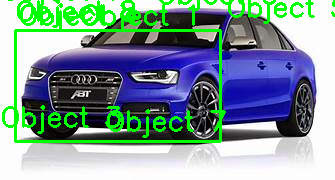

In [29]:
# Annotate the original image
image = cv2.imread(image_path)
for idx, box in enumerate(predictions[0]['boxes']):
     cv2.putText(image, f"Object {idx}", (int(box[0]), int(box[1]) - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)


In [30]:
# Save the final annotated image
cv2.imwrite('annotated_image.png', image)


True

In [31]:
# Save the data table as a CSV
data_table.to_csv('object_data.csv', index=False)
